In [718]:
import random
import numpy as np
from tqdm import tqdm

##Question 1: PCA

You are given a dataset in $\mathbb{R}^d$, $x_1,\dots,x_N$ that is already centered at zero: $\frac{1}{N}\sum_{i=1}^N x_i=0$. You calculate the covariance matrix:
$$\Sigma = \frac{1}{N}\sum_{i=1}^N x_ix_i^\top$$

The trace of this matrix is the "regular" variance of the data: $\sigma^2 = \frac{1}{N}\sum_{i=1}^N \|x_i\|^2$ (we do not need to subtract the mean because the mean is already zero). Suppose that you perform PCA onto the first $k$ principle components. Let the projected dataset in $\mathbb{R}^k$ be $x^{PCA}_1,\dots,x^{PCA}_N$.



```
# This is formatted as code
```

###Question 1.a (5 points)
Show that $\frac{1}{N} \sum_{i=1}^N x^{PCA}_i=0$.

ANSWER HERE

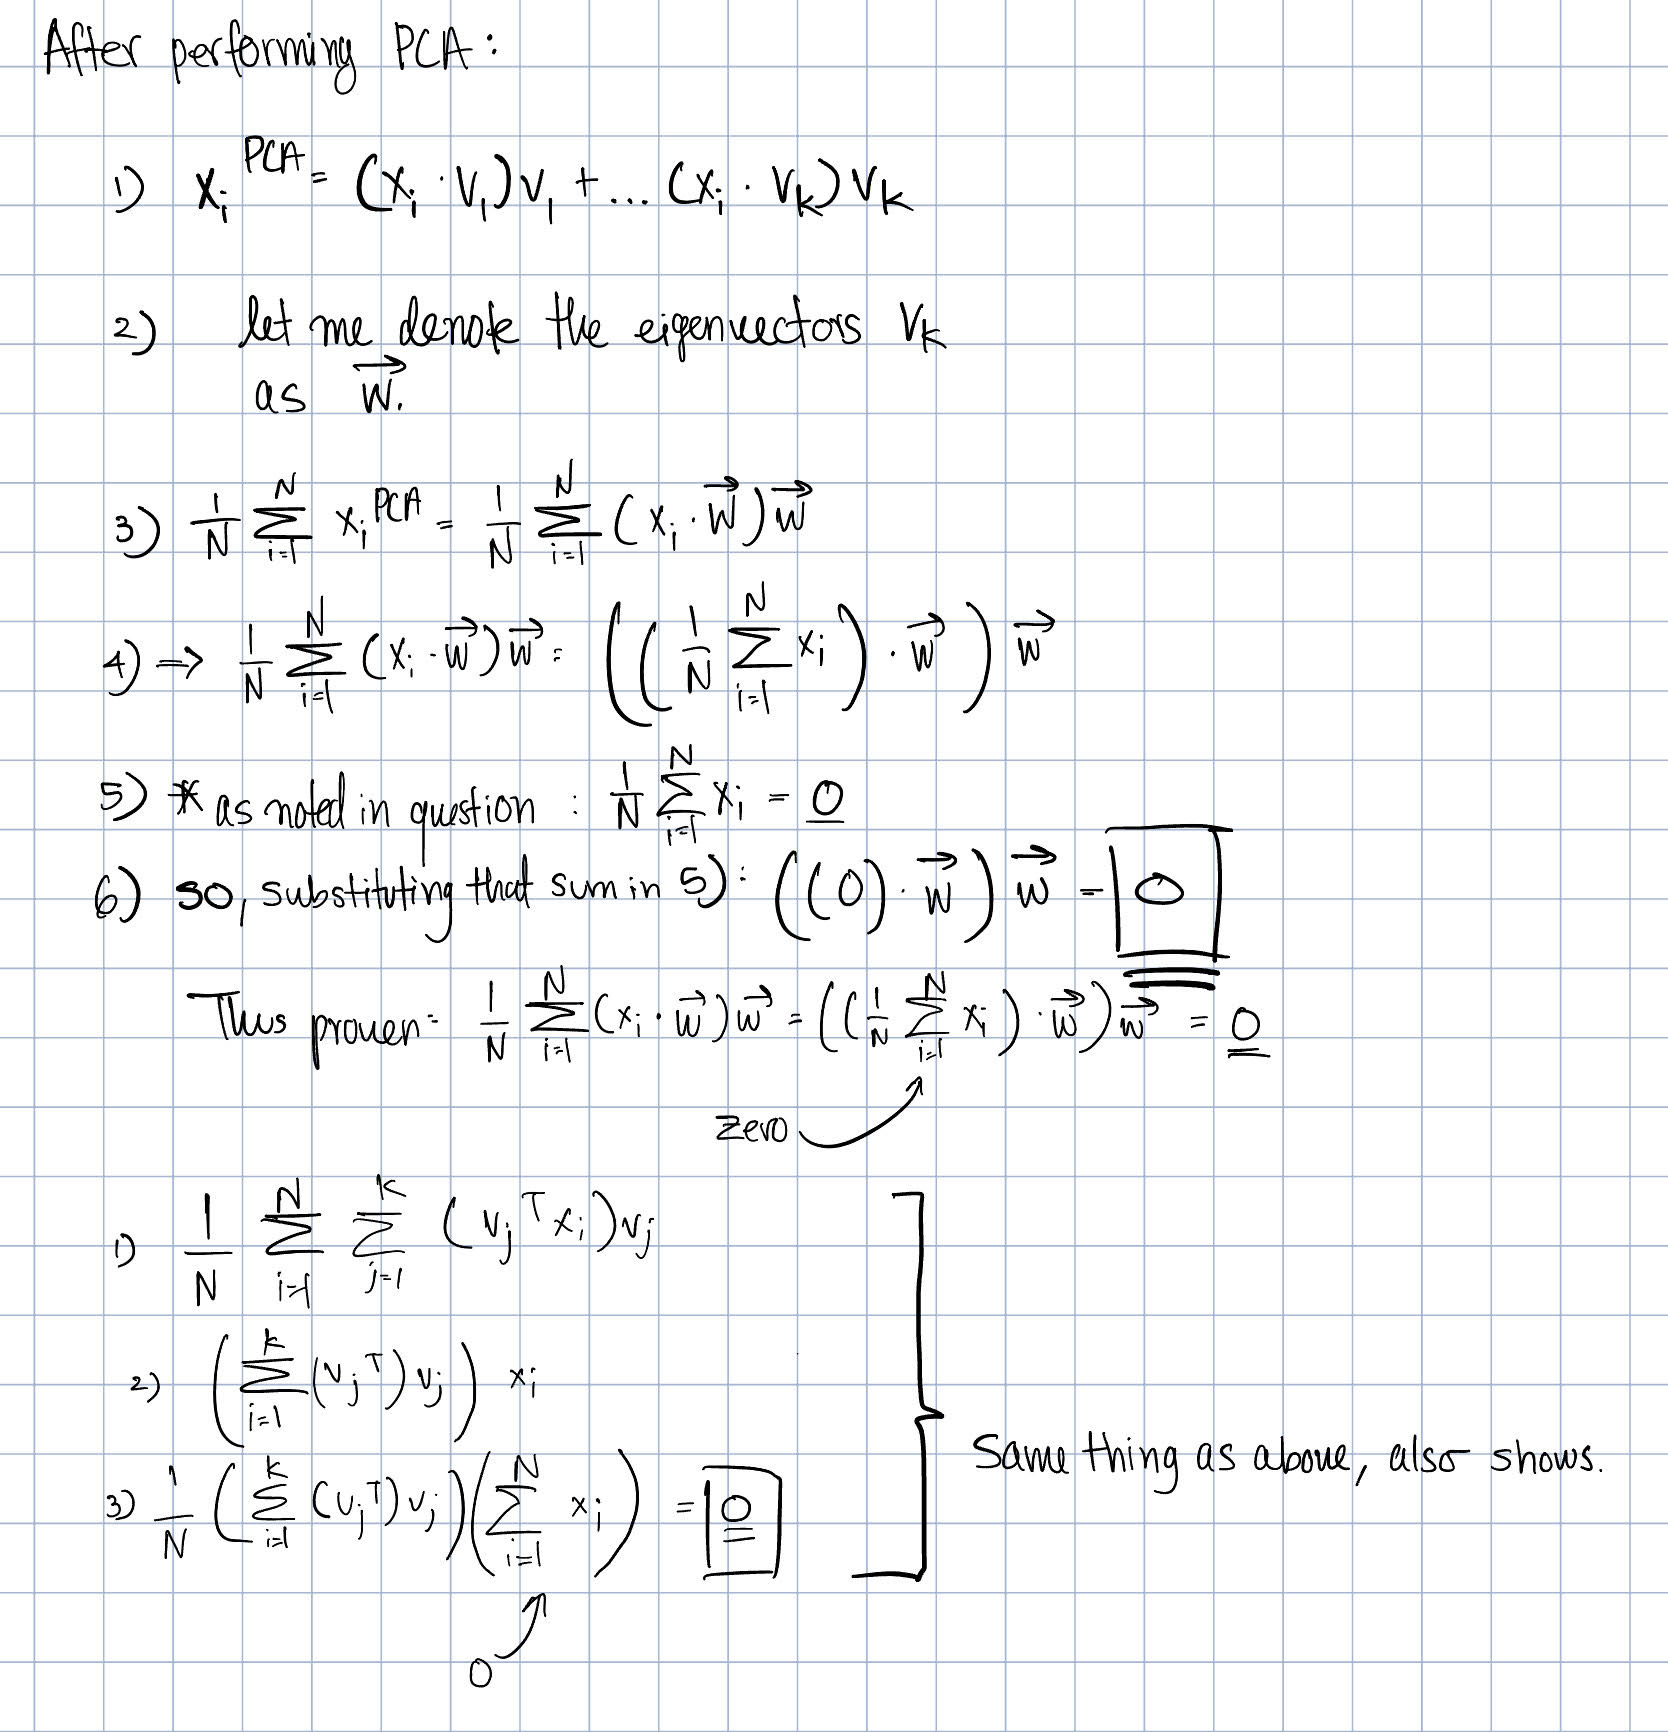



### Question 1.b (10 points)
Show that $\frac{1}{N} \sum_{i=1}^N \|x_i^{PCA}\|^2 \ge \frac{k}{d} \sigma^2$. Hints: (1) the trace of a symmetric matrix is equal to the sum of its eigenvalues. (2) It might help to show the following identity: if $v$ is a normalized eigenvector of $\Sigma$ with eigenvalue $\lambda$, then $\frac{1}{N}\sum_{i=1}^N  (v^\top x_i)^2 = \lambda$. To show this, you might want to also justify the fact that $v^\top \Sigma v=\lambda$.

ANSWER HERE
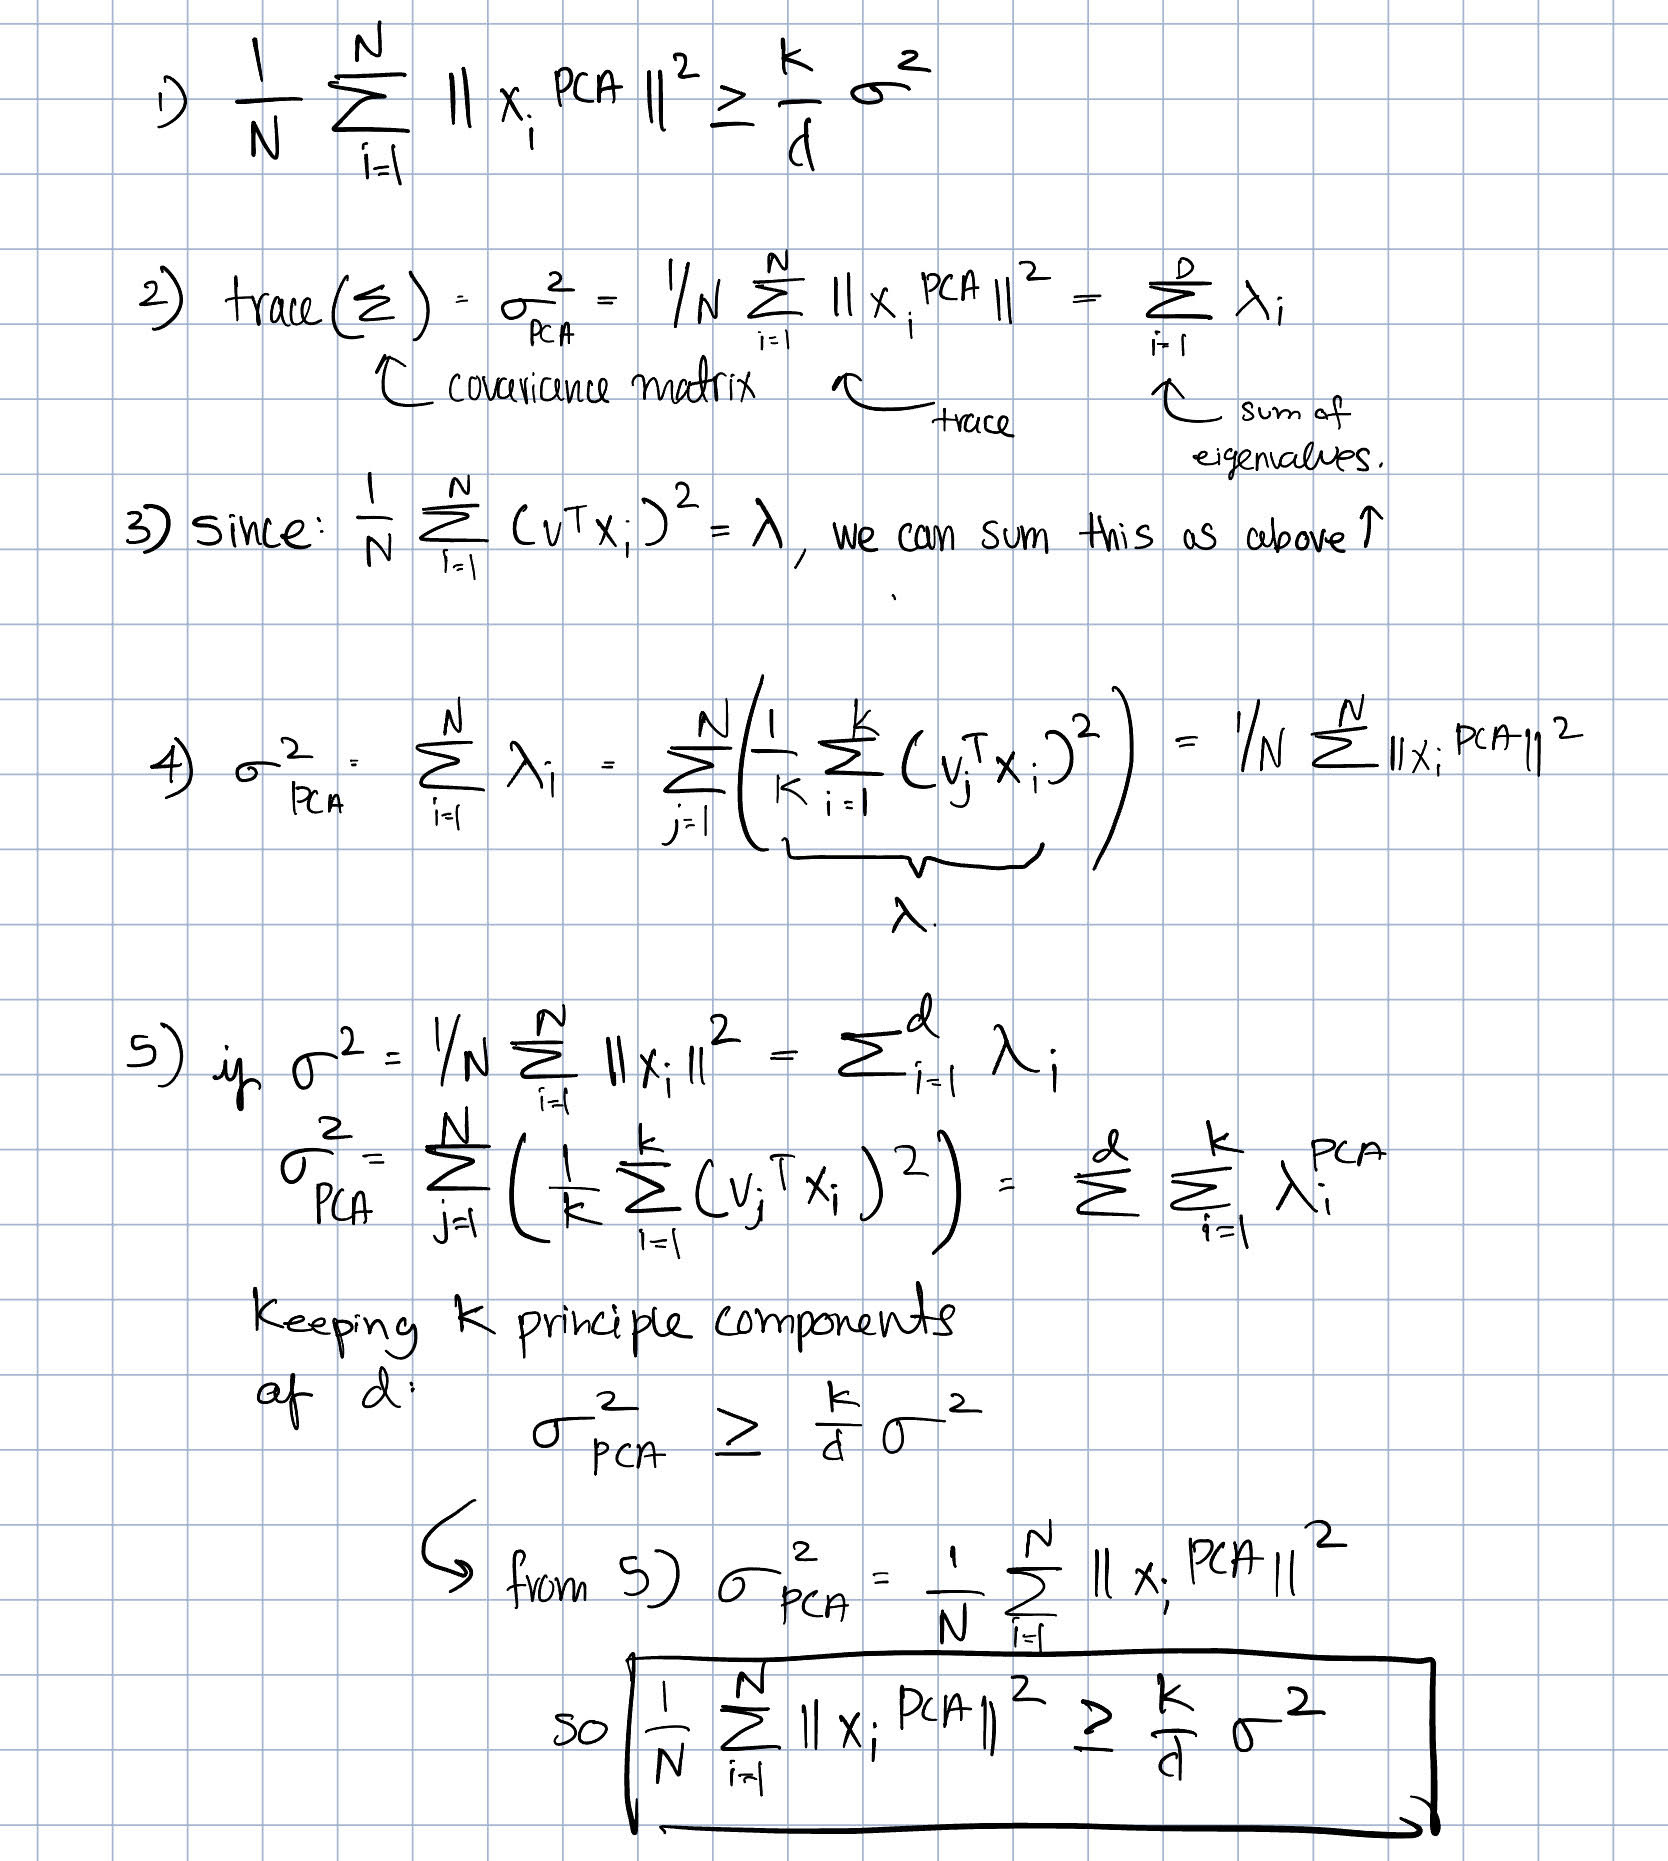

## PCA Example

There are no questions you need to answer in this section but please look through it to see an illustration of how PCA works.

PCA is a dimensionality reduction problem. We will work through a simple numerical example where we translate a 2-dimensional dataset to a 1-dimensional dataset by hand to get a feel for what is going on mathematically. In practice, this would be used for much larger dimensions, but for the sake of easy calculations and data visualization, we have kept the dimensions small.

Suppose you have the following dataset:

$$X = \begin{bmatrix}
  6 & -1 \\
  4 & -1 \\
  8 & 4 \\
  2 & -1     
\end{bmatrix}$$

**a.** Center the dataset and plot it. We will call this centered data matrix $\tilde{X}$.


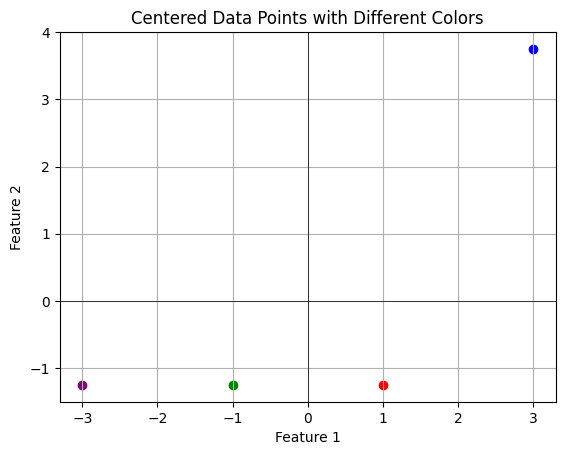

In [719]:
import numpy as np
from matplotlib import pyplot as plt

# Original dataset
X = np.array([[6, -1],
              [4, -1],
              [8, 4],
              [2, -1]])

# Mean of each feature
mu = np.mean(X, axis=0)

# Centered data matrix
X_tilde = X - mu

# Define colors for each data point
colors = ['red', 'green', 'blue', 'purple']

# Plot the centered data points with different colors
for i in range(len(X_tilde)):
    plt.scatter(X_tilde[i, 0], X_tilde[i, 1], color=colors[i])

plt.title('Centered Data Points with Different Colors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**b.** Compute the covariance matrix of the data:

The data matrix is centered, so we just have $\Sigma = \frac{1}{n}\tilde{X}^T\tilde{X}$



In [720]:
# Number of data points
n = X_tilde.shape[0]

# Compute covariance matrix
cov_matrix = (1/n) * np.dot(X_tilde.T, X_tilde)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[5.     3.75  ]
 [3.75   4.6875]]


**c.** Calculate the eigenvalues and eigenvectors of the covariance matrix, making sure the eigenvectors are unit length. Then we plot the eigenvectors on the dataset.



Eigenvalues:
[8.5970038 1.0904962]

Eigenvectors:
[[ 0.72167532 -0.6922317 ]
 [ 0.6922317   0.72167532]]


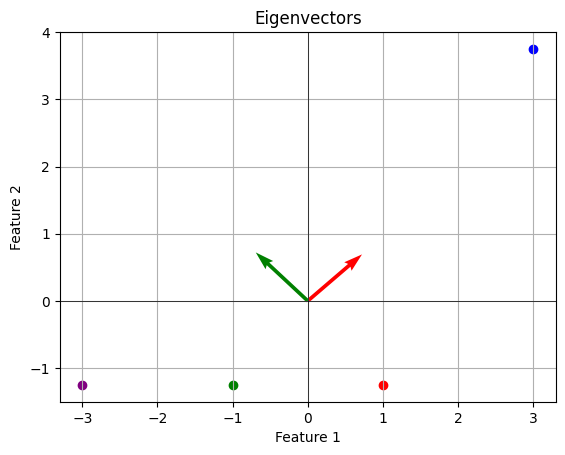

In [721]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Define colors for each data point
colors = ['red', 'green', 'blue', 'purple']

# Plot the centered data points with different colors
for i in range(len(X_tilde)):
    plt.scatter(X_tilde[i, 0], X_tilde[i, 1], color=colors[i])

# Plot eigenvectors with the same colors
for i in range(len(eigenvalues)):
    plt.quiver(0, 0, eigenvectors[0, i], eigenvectors[1, i], angles='xy', scale_units='xy', scale=1, color=colors[i])

plt.title('Eigenvectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**d.** We pick k=1 eigenvalues and form a matrix of eigenvectors, C.


In [722]:
# Chosen matrix of eigenvectors
C = np.array([[0.722],
              [0.692]])

# Compute Y
Y = np.dot(X_tilde, C)

print("Transformed Data Matrix Y:")
print(Y)

Transformed Data Matrix Y:
[[-0.143]
 [-1.587]
 [ 4.761]
 [-3.031]]




**e.** We finally transform the standardized data matrix with the matrix of eigenvectors and plot it. We plot it in one dimension (all x2 values are set to 0).


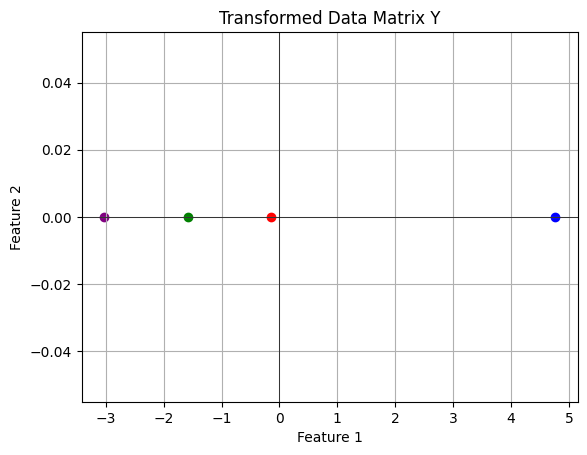

In [723]:
# Define colors for each data point
colors = ['red', 'green', 'blue', 'purple']

# Plot transformed data in one dimension with the same colors as original data points
for i in range(len(Y)):
    plt.scatter(Y[i, 0], 0, color=colors[i])

plt.title('Transformed Data Matrix Y')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## Question 2: Learning to play Blackjack

Blackjack is a card game played against a "dealer". The full rules, including various betting rules we will not use, are available online here: https://bicyclecards.com/how-to-play/blackjack/

The object of the game is to collect a hand of cards whose point total is as close to 21 as possible *WITHOUT* going over. If your point total is over 21, then the dealer automatically wins. A hand of cards is scored as follows:

Each card is worth a certain number of points. For a card specified by a `(value, suit)` tuple,
the number of points it is worth is completely determined by the  `value` term in the tuple (`suit` is irrelevant).

* If `value` is a number "2" through "10", then the card is worth that number of  points.
* If `value` is "Jack", "Queen" or "King", then the card is worth 10 points.
* If `value` is "Ace", then the card is worth EITHER 1 point or 11 points - the player may choose.

The total score of a hand is the total number of points for all cards in the hand, counting each Ace in whichever manner (either 11 or 1) the player chooses.

At the start of the game, you are dealt two cards, and the dealer is dealt  1 card that is visible to you. You may take one of  two actions: a "HIT" or  a "STAY". If you take the "HIT" action, you will be given another card. Getting another card will increase your score, but might also make your score go over 21. If you take the "STAY" action, this  indicates that you  are satisfied  with  your current point total (i.e. you suspect that taking another card might make your score go over  21, or that the dealer will not able to beat your  score without  going over 21 themselves). Not that you may adjust your decision to count an Ace as 1 point  or 11 points at  any  time. So, for  example, if you hand consists of a 9 of clubs and an Ace of spades, you might count the Ace as 11 points for a total of 20 points. However, if you then take the "HIT" action (which is very inadvisable in this case!), you might  be dealt an 8 of hearts, in which case your  total would be  either 28 (counting the Ace as 11)  or 18  (counting  the Ace as 1). So, you could now count the Ace as 1 point and choose the  "STAY" action, to indicate that you are no longer interested in taking another car.

If you take the "HIT" action, then you are dealt a card and again have the option to either take a "HIT" or "STAY" action. You may continue taking the "HIT" action and getting cards until your total is over 21 no matter how you choose to count the Aces. If this happens, then your hand is called "bust" and you automatically lose. So, you should try to choose  the "STAY" action before this occurs.

If you take the "STAY" action, then the dealer will start playing their hand.  The dealer is not allowed to strategize: the  dealer will continually take  the  "HIT" action until their hand is worth 17 points or more. Once that happens, the dealer takes the "STAY" action. The dealer must count Aces as  11 points unless counting the Ace this  way would  cause the  dealer's score to go  over 21.

Outcome of the game:

If you go bust, you automatically lose. If you do  not go bust,  but the dealer  does, then you win. If neither of you go bust, then the person with the  highest score  wins. Otherwise, it is a tie.


Note that the player gets to see the  first card that  the dealer is dealt, but NOT any of the other cards that the dealer will take when making their decisions.


### Reward Structure
To fit this game into the reinforcement learning framework, we need to decide on what rewards to give the  player. We give rewards in the following way:

* If the player takes an action that results in a loss (either "STAY" and then losing after the dealer finishes playing, or "HIT" and going bust), then the  reward is -1.

* If the player takes an action that results in a win (i.e. a "STAY" followed by the dealer either going bust or  having a smaller score than the  player), then the reward is 1.

* If the player takes an action that results in a tie (i.e. a "STAY" followed by the dealer achieving the same score as the player), then the reward is 0.

* If the player takes  an action that does  not result in  the game ending (that is, a "HIT" with the possibility of taking another "HIT"), then the reward is 0.

## Action Structure

The  set of actions  available to the  player  is always either both "HIT" and "STAY", or nothing at all (which happens after taking the "STAY" action, or going  bust), both of which result in entering a terminal state, as the dealer will play out their hand and the player will take no more actions.


In the first part of this question, you will finish a missing part of a Blackjack simulator, and then implement a function that converts the "full" state of the blackjack game (which includes the complete card identity of all cards in the players hand) into  a "minimal" state that contains just the critical information needed by your reinforcement learning agent to play the game optimally.



In [724]:
# Two helpful functions for running a blackjack game.

def draw_card():
  '''
  returns a randomly selected (value, suit) tuple representing a random card.
  Assumes cards are drawn from infinitely many decks shuffled together (so
  your agent cannot gain an advantage by counting cards in this game).
  '''
  value = random.choice(['Ace'] + [str(i) for i in range(2,11)] + ['Jack', 'Queen', 'King'])
  suit = random.choice(['Clubs', 'Hearts', 'Spades', 'Diamonds'])

  return (value, suit)

print(draw_card())

def hand_to_str(hand):
  '''
  Returns a string containing a human-readable description of a blackjack hand.
  Note this function returns a string, it does not call `print`.
  '''
  def card_to_str(c):
    value, suit = c
    return value + ' of ' + suit
  return ', '.join([card_to_str(c) for c in hand])

('4', 'Spades')


## Question 2.a (10 pts)

Implement the function `score_hand` below. See the doc-string for arguments and return value specifications.

In [725]:
def score_hand(hand):
  '''
  returns the best possible score for a given hand.

  You can read the full scoring rules below, and also at this link https://bicyclecards.com/how-to-play/blackjack/ under "Card Values/scoring".

  The rules for scoring are:
  Each card is worth a certain number of points. For a card specified by a (value, suit) tuple,
  the number of points it is worth is completely determined by the  "value" term in the tuple (suit is irrelevant).
  If the value term is a number 2 through 10, then the card is worth that number of  points.
  If the value is "Jack", "Queen" or "King", then the card is worth 10 points.
  If the value is "Ace", then the card is worth EITHER 1 point or 11 points - the player may choose.

  The total score of a hand is the total number of points for all cards in the hand, counting each Ace in whatever manner
  the player chooses.
  The objective of the game is to  have as high as score as possible WITHOUT going over 21. So a score of 21 is a "perfect" score,
  a score of 20 is a very good score, and a score of 22 is very bad score (if you go over 21 you automatically lose).

  arguments:
    hand: a list of (value, suit) pairs specifying the hand of the player.
        both "value" and "suit" are represented by strings.
  return two values:
    (score, eleven_valued_aces)

    score: a non-negative integer representing either:
      1. The highest score possible with this hand that is less than or equal to 21. Multiple scores  might be  possible  if the  hand
        contains one or more  Aces. You  must find the  largest score that is less than or equal to 21 if such a thing exists.
      2. If it is impossible for this hand to score less than or equal to 21 (the hand is called "bust" in this case),
        then return the lowest possible score for the hand (which must necessarily be >21).

    eleven_valued_aces: the number of aces in the hand that were scored at 11 points rather than 1 point
      in order to achieve the score provided in the first return value (these are also called "soft" aces).
    '''

  ## Your Code Here
  score = 0
  eleven_valued_aces = 0

  aces = sum(1 for value, _ in hand if value == 'Ace')

  for value, _ in hand:
      if value.isdigit():
          score += int(value)
      elif value in ['Jack', 'Queen', 'King']:
          score += 10

  for _ in range(aces):
      if score + 11 <= 21:
          score += 11
          eleven_valued_aces += 1
      else:
          score += 1

  return score, eleven_valued_aces



In [726]:
test_cases = {
  (('Ace', 'Clubs'),): (11, 1),
  (('Ace', 'Hearts'), ('Ace', 'Spades'),): (12, 1),
  (('8', 'Clubs'), ('King', 'Diamonds'), ('9', 'Spades'),): (27, 0),
  (('Ace', 'Hearts'), ('7', 'Diamonds'), ('Ace', 'Clubs'), ('King', 'Diamonds'),): (19, 0),
  (('10', 'Spades'),): (10, 0),
  (('King', 'Spades'), ('Ace', 'Clubs'),): (21, 1),
  (('Ace', 'Hearts'), ('7', 'Diamonds'), ('10', 'Diamonds'),): (18, 0),
  (('10', 'Clubs'), ('4', 'Hearts'), ('Ace', 'Spades'), ('8', 'Spades'),): (23, 0),
  (('4', 'Clubs'), ('7', 'Hearts'), ('Ace', 'Spades'), ('2', 'Clubs'), ('King', 'Diamonds'),): (24, 0),
  (('2', 'Hearts'), ('5', 'Hearts'), ('2', 'Hearts'), ('3', 'Hearts'), ('3', 'Diamonds'), ('King', 'Spades'),): (25, 0),
  (('10', 'Clubs'),): (10, 0),
  (('King', 'Hearts'), ('Ace', 'Spades'),): (21, 1),
  (('4', 'Spades'), ('5', 'Diamonds'), ('3', 'Hearts'),): (12, 0),
  (('4', 'Diamonds'), ('8', 'Hearts'), ('4', 'Spades'), ('6', 'Diamonds'),): (22, 0),
  (('Jack', 'Spades'),): (10, 0),
  (('10', 'Diamonds'), ('7', 'Clubs'),): (17, 0),
  (('Jack', 'Hearts'), ('6', 'Clubs'), ('6', 'Spades'),): (22, 0),
  (('2', 'Diamonds'), ('Ace', 'Spades'), ('8', 'Spades'), ('7', 'Spades'),): (18, 0),
  (('King', 'Clubs'),): (10, 0),
  (('Ace', 'Hearts'), ('Jack', 'Diamonds'),): (21, 1),
  (('4', 'Clubs'), ('2', 'Diamonds'), ('4', 'Spades'),): (10, 0),
  (('King', 'Spades'), ('10', 'Hearts'), ('2', 'Clubs'), ('5', 'Spades'),): (27, 0),
  (('Queen', 'Hearts'),): (10, 0),
}

def test_score_hand():
  for hand, true_output in test_cases.items():
    output = score_hand(list(hand))
    assert output == true_output, f"incorrect output on test case: {hand}. Expected output: {true_output}, computed output: {output}"
  print("all tests pass :)")



test_score_hand()

all tests pass :)


## Run the following cell to test your implemention of  Q1.a.

In [727]:
test_score_hand()

all tests pass :)


The following cell contains the blackjack game code. You don't need to modify it, but you're welcome to read it to see how it works.

In [728]:
class BlackjackSimulator:
  '''
  This class simulates a (slightly simplified) version of the card game Blackjack.

  The player's current hand is accessible via the `player_hand` attribute.
  The dealers' current hand is accessible via the `dealer_hand` attribute.

  Both hands are stored as lists of cards, where each card is a tuple (value, suit) as
  returned by `draw_card()`

  The actions currently available to the player are accessible via `available_actions` attribute.
  The last reward earned by the player is accessible via the `reward` attribute.

  Check the docstrings of the individual methods to see what they do.
  In our reference solution, we access the `player_hand` and `dealer_hand` attribute
  in the function `get_state`. We do not use any other internals of BlackjackSimulator objects.
  However, if you find it useful to use some internal methods or attributes, you may do so.

  See the rules of blackjack here: https://bicyclecards.com/how-to-play/blackjack/

  We do not play with "naturals" here as they do not require any decision making.
  This actually makes the odds a little worse than they should be, so your agent
  would actually do slightly better in a casino than it will in this simulator.

  It still wouldn't beat the house though. Gambling is dangerous, and we do not endorse it!

  If you find any other discrepencies in the official rules and the game as implemented
  in this simulator, please write your code to do well on this simulator, not the official rules :)
  '''


  def __init__(self):
    # the player starts with two cards
    self.player_hand = [draw_card(), draw_card()]

    # the dealer starts with one visible card
    self.dealer_hand = [draw_card()]

    self.available_actions = ['HIT', 'STAY']

    # this will hold the reward of the current state of the game. It will always be
    # either -1, (loss), 0 (game in progress, or tie), or 1 (win)
    self.reward = 0


  def is_game_over(self):
    '''
    returns True if the game is over.
    At this point, self.reward will hold the result of the game
    (0 for tie, 1 for player win, -1 for player loss).
    '''
    return len(self.available_actions) == 0

  def player_hand_str(self):
    '''
    returns a string representation of the player hand (it does not actually
    call the `print` method).
    '''
    return hand_to_str(self.player_hand)

  def dealer_hand_str(self):
    '''
    returns a string representation of the dealer hand (it does not actually
    call the `print` method).
    '''
    return hand_to_str(self.dealer_hand)

  def get_reward(self):
    '''
    get reward from last action taken.
    '''
    self.reward = self._get_reward()
    return self.reward

  def _get_reward(self):
    '''
    helper function for self.get_reward: this one has all the actual logic.
    '''
    if len(self.available_actions) != 0:
      # we are still playing - you might yet win!
      return 0

    dealer_score = self.dealer_score()
    player_score = self.player_score()
    if player_score==dealer_score:
      # this is the only way to tie.
      return 0

    # we must have a winner.
    if player_score > 21:
      # dealer wins when player busts (even if the dealer also busts)
      return -1
    if dealer_score > 21:
      # dealer bust, player did not bust.
      return 1
    if player_score > dealer_score:
      return 1
    return -1

  def player_score(self):
    return score_hand(self.player_hand)[0]

  def dealer_score(self):
    return score_hand(self.dealer_hand)[0]

  def take_action(self, action: str):
    '''
    plays one turn of blackjack.

    arguments:
      action: a string value, must be an element of self.available_actions

    returns:
      a reward for this action (integer).
    '''

    assert action in self.available_actions, f"Attempted action: {action}, but the available actions are: {self.available_actions}. The current hand is: {self.player_hand}"


    if action == 'STAY':
      self.available_actions = []
      # once the player STAYs, the dealer will play out its hand.
      while self.dealer_score() < 17:
        # dealer hits until score is 17 or bigger
        self.dealer_hand.append(draw_card())
    else:
      self.player_hand.append(draw_card())
      if self.player_score() > 21:
        # BUST!
        self.available_actions = []


    return self.get_reward()


In [729]:
## This cell contains some helper functions that print the current state of the
# blackjack game in a human-readable way, as well as allow you to test the blackjack
# simulator by playing with it yourself.


def print_status(bs):
  print(f"Current Total: {bs.player_score()}\nCurrent hand: {bs.player_hand_str()}")
  print(f"Dealer Total: {bs.dealer_score()}\nDealer hand: {bs.dealer_hand_str()}")
  if len(bs.available_actions) == 0:
    if bs.get_reward() == 0:
      print(f"It's a tie!")
    elif bs.get_reward() == 1:
      print(f"Player Wins!")
    elif bs.get_reward() == -1:
      print(f"Player loses!")
    return False
  else:
    return True

def play_blackjack():
  bs = BlackjackSimulator()

  def get_action():
    action = None
    options = bs.available_actions
    while action not in options:
      if  action is not None:
        print(f"{action} is not an allowed action. Please select again.")
      print("Available Actions:")
      for option in options:
        print(f"* {option}")
      action = input("Your selection: ").upper()
    return action

  print_status(bs)
  while not bs.is_game_over():
    action = get_action()
    bs.take_action(action)
    print_status(bs)


If you want, uncomment the following cell and run it to play blackjack yourself. You won't be graded on its output.

In [730]:
## Who needs artificial intelligence, we have natural intelligence: fully organic and free-range!
play_blackjack()

Current Total: 12
Current hand: Ace of Diamonds, Ace of Clubs
Dealer Total: 10
Dealer hand: Jack of Hearts
Available Actions:
* HIT
* STAY
Current Total: 22
Current hand: Ace of Diamonds, Ace of Clubs, Jack of Spades
Dealer Total: 10
Dealer hand: Jack of Hearts
Player loses!


## Question  2b (10pts)
Implement `get_state` below. This function captures the minimal information needed by an agent to make an optimal decision about what action to take. As specified in the docstring, the input should be a BlackjackSimulator object as defined above. You need to extract from this object a tuple: `(player_score, player_eleven_valued_aces, dealer_score, dealer_eleven_valued_aces)` where `player_score` is the current score of the player, `player_eleven_valued_aces` is the current number of aces the player is counting as 11 points rather than 1 point, and similarly for the `dealer_*` variables. As specified in the docstring of the `BlackjackSimulator` class, the player and dealer hands are accessible via `sim.player_hand` and `sim.dealer_hand`.

In [731]:
def get_state(sim: BlackjackSimulator):
  '''
  find the score and number of aces values at 11 points rather than 1 point in both the player and dealer's hands (aka "soft aces").

  arguments:
    sim: a BlackjackSimulator object.

  returns:
     a tuple (player_score, player_eleven_valued_aces, dealer_score, dealer_eleven_valued_aces)
  '''
  state = (sim.player_score(), int(score_hand(sim.player_hand)[1]), sim.dealer_score(), int(score_hand(sim.dealer_hand)[1]))
  return state

x = BlackjackSimulator()
print(get_state(x))
print(x.player_hand)
print(x.dealer_hand)

#good

(20, 0, 7, 0)
[('King', 'Clubs'), ('Jack', 'Clubs')]
[('7', 'Spades')]


In [732]:
# Argument checking functions that are useful for making sure your implementation
# of Q-learning is passing the correct values around.

def assert_valid_action(action):
  assert action in ['HIT', 'STAY'], f"invalid action: {action}"

def assert_valid_state(state):
  assert type(state) == tuple, f"state must be a tuple, but was: {state}"

  p_score, p_aces, d_score, d_aces = state
  assert type(p_score) == int and type(p_aces) == int and type(d_score) == int and type(d_aces) == int, f"state has invalid types: {state}"
  assert p_score>=4 and p_aces>=0 and p_score<=31 and d_score>=2 and d_aces>=0 and d_score<=27, f"state has impossible values: {state}"


## Question 2.c (10 pts)
Why is the output of `get_state` sufficient for designing an optimal agent? Why is it preferable to use this output rather than the full state of the game (which includes all individual hand card values and suits)?


##  WRITE YOUR  ANSWER HERE


        Because we are reducing downt the state to the most important factors, the value of our hand and how many eleven valued aces there are so we can choose between 11 and 1. This is all the information we need to determine our next action. Having more information, like the every card and value of each would be redundant unnecessarily complex. 

In [733]:
class Q_Function:
  '''
  class for holding a Q function.
  This class is essentially a manual implementation of a DefaultDict with
  default value zero and a little type checking on top to help catch some bugs
  that might occur when you use it.
  '''
  def __init__(self):
    self.Q = dict()

  def set_value(self, state, action, value):
    '''
    sets the estimated Q(s, a) to be a given value.

    arguments:
      state: the state (a tuple as returned  by get_state)
      action:  a string.
      value: a float.

    returns
      None

    This function updates the Q function so that Q(state, action) = value.
    '''

    assert_valid_state(state)
    assert_valid_action(action)
    assert value <=1.00001 and value >= -1.00001, f"Q learning should never set a Q value of: {value}!"
    if state not in self.Q:
      self.Q[state] = {}
    self.Q[state][action] = value

  def get_value(self, state, action):
    '''
    Return Q(s,a): gets the estimated Q value for a given state, action pair.
    '''
    assert_valid_state(state)
    assert_valid_action(action)
    if not self.seen(state, action):
      return 0.0
    return self.Q[state][action]


  ## the following functions are  not needed in your code, but might be useful
  ## in debugging.
  def get_seen_actions_for_state(self, state):
    '''
    for a given state, return a list of all actions that have been "seen"
    in the  sense that the agent has taken this action from this state.
    '''
    assert_valid_state(state)
    if state not in self.Q:
      return []
    return self.Q[state].keys()

  def seen(self, state, action):
    '''
    Return True if the given  state, action pair has been visited by the agent before.
    False otherwise.
    '''
    assert_valid_state(state)
    assert_valid_action(action)
    if state not in self.Q:
      return False
    if action not in self.Q[state]:
      return False
    return True


## Question 2.d (20 pts) Implement Q-Learning.

You must implement three functions:
* `max_q_for_state`.
* `Q_learner.update`.
* `Q_learner.get_action`.

Please see the doc strings for descriptions of what they must accomplish.

### Primer on Q Learning.

Q-learning allows us to train a policy on-the-fly while playing many games of Blackjack. We maintain "Q-function": $Q(s,a)$. Eventually $Q(s,a)$ should equal:
$$
Q(s,a) = r(s,a) + \sum_{s'} P(s'|s,a) V_{\pi_\star}(s')
$$
That is, $Q(s,a)$ records the total reward we can expect to obtain if we (1) start in state $s$, and then (2) take action $a$, and finally (3) follow the optimal policy $\pi_\star$ for all subsequent actions. If we knew this $Q$ function, exactly, then it would hold that $\pi_\star(s) = \text{argmax}_a Q(s,a)$.

Furthermore, the correct $Q$ function should satisfy the following identities:
$$
\begin{align*}
V_{\pi_\star}(s) &= \max_a Q(s,a)\\
Q(s,a) &= r(s,a) + \sum_{s'} P(s'|s,a) \max_a Q(s', a)
\end{align*}
$$

Q-learning does the following: we maintain an estimate of $Q(s,a)$ for all states/actions $s,a$. (i.e. initialized as $Q(s,a)=0$ to begin). Our estimate will be *incorrect* throughout the learning process, but will slowly converge to the true value. Now, when in state $s_t$, the learner will:

1. Take action $a_t=\text{argmax}_{a} Q(s_t,a)$ with probability 0.999. Otherwise (with probability 0.0001), take a random action.
2. See reward $r_t=r(s,a)$, transition to state $s_{t+1}$.
3. Update the value of $Q(s_t,a_t)$ via the formula:
$$
Q(s_t, a_t)\leftarrow Q(s_t, a_t) + \eta \cdot (\max_a Q(s_{t+1}, a) + r_t - Q(s_t, a_t))
$$
where $\eta$ is some provided learning rate.

Intuitively, in step (1), we take an action "assuming" that our current estimate $Q$ is the "correct" $Q$ function (which is not actually true, but might become more true over time). Then, in step 3, we use our observed reward and state transition to update our estimate of $Q(s_t,a_t)$ to be hopefully more correct.

The class `Q_function` provides an implementation of a Q-function that you can update while learning. Please read the docstrings for its methods to see how to use it. The most important methods are `get_value` and `set_value`.


In [734]:
def max_q_for_state(Q, state, actions):
    max_q = -1
    action_choose = None
    
    for action in actions:
        q_value = Q.get_value(state, action) 
        if q_value > max_q:
            max_q = q_value
            action_choose = action
    
    return max_q, action_choose


class Q_Learner:
    '''
    A Q-learning class.
    '''

    def __init__(self, eta):
        '''
        eta: the learning rate for Q learning.
        '''
        self.Q = Q_Function()
        self.eta = eta

    def update(self, prev_state, prev_action, sim, reward):
        next_q, _ = max_q_for_state(self.Q, get_state(sim), ["HIT", "STAY"])
        current_q = self.Q.get_value(prev_state, prev_action) 
        update_q = current_q + (self.eta * ((reward + next_q) - current_q))
        self.Q.set_value(prev_state, prev_action, update_q)  

    def get_action(self, sim):
        state = get_state(sim)
        _, choose_action = max_q_for_state(self.Q, state, ["HIT", "STAY"])
        r = random.random()
        # print(r)
        if r < 0.999:
            return choose_action
        else:
            return random.choice(["HIT", "STAY"])


In [735]:
def run_Q_learning(iter_count, eta):
  policy = Q_Learner(eta)
  pbar = tqdm(range(iter_count))
  for i in pbar:
    sim = BlackjackSimulator()
    while not sim.is_game_over():
      state = get_state(sim)
      action = policy.get_action(sim)
      reward = sim.take_action(action)
      policy.update(state, action, sim, reward)
  return policy

In [736]:
def run_policy_verbose(learner, verbose_level=1):
  '''
  Run a learned policy on a single game of blackjack.
  Prints out the states and actions taken during the game.
  You may control the amount of information printed by increasing `verbose_level`.

  You will not be graded on any output from this function: feel free to modify
  it when debugging your code.
  '''
  sim = BlackjackSimulator()
  print_status(sim)
  while not sim.is_game_over():
    action = learner.get_action(sim)
    state = get_state(sim)

    print(f"Learner takes action: {action}")

    if verbose_level > 0:
      seen_actions = learner.Q.get_seen_actions_for_state(state)
      print(f"Actions tested in training: {seen_actions}")
      for seen_action in seen_actions:
        print(f"Q value for action {seen_action}: {learner.Q.get_value(state, seen_action)}")

    sim.take_action(action)

    print_status(sim)

  return sim.reward



In [737]:
# This cell and the next one are for you to test your learner with a small number
# of iterations if you desire. You will not be graded on their contents.
small_policy = run_Q_learning(100, 0.1)

100%|██████████| 100/100 [00:00<00:00, 7693.01it/s]


In [738]:
reward = run_policy_verbose(small_policy, verbose_level=1)

Current Total: 14
Current hand: 7 of Clubs, 7 of Clubs
Dealer Total: 7
Dealer hand: 7 of Hearts
Learner takes action: HIT
Actions tested in training: []
Current Total: 16
Current hand: 7 of Clubs, 7 of Clubs, 2 of Hearts
Dealer Total: 7
Dealer hand: 7 of Hearts
Learner takes action: STAY
Actions tested in training: dict_keys(['HIT'])
Q value for action HIT: -0.1
Current Total: 16
Current hand: 7 of Clubs, 7 of Clubs, 2 of Hearts
Dealer Total: 17
Dealer hand: 7 of Hearts, 10 of Clubs
Player loses!


## Evaluate your Q-learning algorithm.
You do not need to write any code here. If your performance is worse than -0.07, then you probably have a bug in an earlier question. If your performance is better than -0.05, then you also probably have a bug in an earlier question.

In [739]:
# let's train for 200000 games of blackjack. If a real game took about 5 minutes, this would be almost two years of continuous blackjack!
# This should not take very long. Our reference solution takes less than 30 seconds.
policy = run_Q_learning(200000, 0.05)

100%|██████████| 200000/200000 [00:10<00:00, 18773.86it/s]


In [740]:
# Testing code: you may NOT modify this cell.
def run_policy(learner):
  sim = BlackjackSimulator()
  while not sim.is_game_over():
    action = learner.get_action(sim)
    state = get_state(sim)
    sim.take_action(action)

  return sim.reward



def test_policy(policy, iterations=10000):
  '''
  tests a policy for `iterations` number of games.
  Returns the average reward obtained by the policy.
  '''
  pbar = tqdm(range(iterations))
  total_reward = 0.0
  for i in pbar:
    total_reward += run_policy(policy)

  return total_reward/iterations


In [741]:
# Test your learned policy. You should obtain a score of at least -0.07, and at most -0.05
# The house always wins eventually :)

test_policy(policy)

100%|██████████| 10000/10000 [00:00<00:00, 22568.88it/s]


-0.0632